In [44]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

In [107]:
path_to_complete_annotation = "second_annotation/control_manahil.csv"
df_complete = pd.read_csv(path_to_complete_annotation, index_col = 'Unnamed: 0')
output_df = df_complete
df_complete

FileNotFoundError: [Errno 2] No such file or directory: 'second_annotation/control_zain.csv'

In [16]:
filtered = output_df[(output_df['label_1'] != None) & (output_df['label_2'] != None) & (output_df['label_1'].notna())& (output_df['label_2'].notna())]
filtered
sklearn.metrics.cohen_kappa_score(filtered.label_1, filtered.label_2)

0.6871214116407691

In [108]:
path_to_test_annotation = "control_tests/control_zain.csv"
df_test = pd.read_csv(path_to_test_annotation, index_col = "Unnamed: 0")
df_test

,id_column,annotate_text,label,annotated_at
0,12072,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,NaN,2022-12-09 23:52:15
1,4384,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,full_standard_english,2022-12-09 23:54:21
2,18214,<b>Raw:</b> John\nPallelai bedokwalk no49 miss...,NaN,2022-12-09 23:54:25
3,23756,<b>Raw:</b> Pallelai bedokwalk no 49.misslohah...,NaN,2022-12-09 23:54:29
4,8412,<b>Raw:</b> Hoping to keep our record running ...,NaN,2022-12-09 23:55:06
...,...,...,...,...
95,8359,<b>Raw:</b> Kahit anong pain pa mararamdaman m...,code-switched,2022-12-10 00:23:35
96,19417,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,NaN,2022-12-10 00:23:39
97,6012,<b>Raw:</b> Starlink is available for pre-orde...,not-syntactic_standard_english,2022-12-10 00:23:53
98,14511,<b>Raw:</b> Carlos Alcaraz reinforced his stat...,full_standard_english,2022-12-10 00:24:13


In [109]:
df_joined = df_test.merge(df_complete, how = 'left', on = 'id_column')
df_joined

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
0,12072,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,NaN,2022-12-09 23:52:15,<b>Raw:</b> John\nPallelai bedokwalk no 49.mis...,NaN,2022-12-09 22:58:45
1,4384,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,full_standard_english,2022-12-09 23:54:21,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,NaN,2022-12-09 23:02:15
2,18214,<b>Raw:</b> John\nPallelai bedokwalk no49 miss...,NaN,2022-12-09 23:54:25,<b>Raw:</b> John\nPallelai bedokwalk no49 miss...,NaN,2022-12-09 22:57:23
3,23756,<b>Raw:</b> Pallelai bedokwalk no 49.misslohah...,NaN,2022-12-09 23:54:29,<b>Raw:</b> Pallelai bedokwalk no 49.misslohah...,NaN,2022-12-09 23:03:26
4,8412,<b>Raw:</b> Hoping to keep our record running ...,NaN,2022-12-09 23:55:06,<b>Raw:</b> Hoping to keep our record running ...,not-syntactic_standard_english,2022-12-09 23:02:02
...,...,...,...,...,...,...,...
95,8359,<b>Raw:</b> Kahit anong pain pa mararamdaman m...,code-switched,2022-12-10 00:23:35,<b>Raw:</b> Kahit anong pain pa mararamdaman m...,code-switched,2022-12-09 23:00:18
96,19417,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,NaN,2022-12-10 00:23:39,<b>Raw:</b> John\nPallelai bedokwalk no49.miss...,NaN,2022-12-09 23:01:47
97,6012,<b>Raw:</b> Starlink is available for pre-orde...,not-syntactic_standard_english,2022-12-10 00:23:53,<b>Raw:</b> Starlink is available for pre-orde...,not-syntactic_standard_english,2022-12-09 23:06:32
98,14511,<b>Raw:</b> Carlos Alcaraz reinforced his stat...,full_standard_english,2022-12-10 00:24:13,<b>Raw:</b> Carlos Alcaraz reinforced his stat...,full_standard_english,2022-12-09 22:55:55


In [110]:
df_joined = df_joined.fillna('none')

label_order = ['full_standard_english', 'not-syntactic_standard_english', 'non_standard_english', 'code-switched', 'some_english', 'not_english', 'none']
df_confusion = pd.crosstab(df_joined.label_x, df_joined.label_y).reindex(label_order)[label_order]
df_confusion = df_confusion[label_order].fillna(0)
df_confusion

label_y,full_standard_english,not-syntactic_standard_english,non_standard_english,code-switched,some_english,not_english,none
label_x,,,,,,,
full_standard_english,1.0,2.0,1.0,0.0,0.0,0.0,1.0
not-syntactic_standard_english,3.0,8.0,8.0,1.0,0.0,0.0,6.0
non_standard_english,1.0,2.0,13.0,0.0,0.0,0.0,6.0
code-switched,0.0,0.0,0.0,15.0,4.0,1.0,2.0
some_english,0.0,0.0,0.0,0.0,1.0,0.0,0.0
not_english,0.0,0.0,0.0,0.0,0.0,0.0,0.0
none,1.0,1.0,0.0,0.0,0.0,0.0,22.0


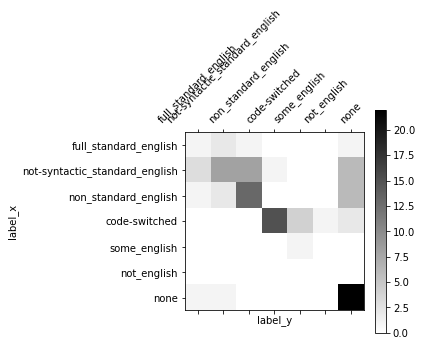

In [111]:
plot_confusion_matrix(df_confusion)

In [126]:
df = df_joined[(df_joined['label_x'] != 'none') & (df_joined['label_y'] != 'none') & (df_joined['label_x'] != 'not-syntactic_standard_english')]
sklearn.metrics.cohen_kappa_score(df.label_x, df.label_y)
# df

0.6057692307692308

In [113]:
df_joined[df_joined['label_x'] != df_joined['label_y']]

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
1,4384,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,full_standard_english,2022-12-09 23:54:21,<b>Raw:</b> India Bans 54 Chinese Apps Includi...,none,2022-12-09 23:02:15
4,8412,<b>Raw:</b> Hoping to keep our record running ...,none,2022-12-09 23:55:06,<b>Raw:</b> Hoping to keep our record running ...,not-syntactic_standard_english,2022-12-09 23:02:02
5,22154,<b>Raw:</b> Bleach has got some of the most in...,not-syntactic_standard_english,2022-12-09 23:55:13,<b>Raw:</b> Bleach has got some of the most in...,full_standard_english,2022-12-09 22:57:52
6,19104,<b>Raw:</b> The fact that this and Chickenhare...,not-syntactic_standard_english,2022-12-09 23:55:35,<b>Raw:</b> The fact that this and Chickenhare...,full_standard_english,2022-12-09 23:05:42
7,17045,<b>Raw:</b> TTB doing a massive giveaway. If y...,not-syntactic_standard_english,2022-12-09 23:55:47,<b>Raw:</b> TTB doing a massive giveaway. If y...,non_standard_english,2022-12-09 22:59:33
9,23532,"<b>Raw:</b> forget jetlag, my body is not read...",not-syntactic_standard_english,2022-12-09 23:56:06,"<b>Raw:</b> forget jetlag, my body is not read...",non_standard_english,2022-12-09 23:06:40
12,13698,<b>Raw:</b> A Green Themed Fun Beach Lawn Rec...,not-syntactic_standard_english,2022-12-09 23:56:34,<b>Raw:</b> A Green Themed Fun Beach Lawn Rec...,none,2022-12-09 23:06:14
14,7704,<b>Raw:</b> @eileenglee @sillysyntax Once a we...,not-syntactic_standard_english,2022-12-09 23:57:05,<b>Raw:</b> @eileenglee @sillysyntax Once a we...,non_standard_english,2022-12-09 23:02:07
15,12533,<b>Raw:</b> Pretty good shiny haul 🤩 toothpast...,not-syntactic_standard_english,2022-12-09 23:57:18,<b>Raw:</b> Pretty good shiny haul 🤩 toothpast...,non_standard_english,2022-12-09 22:59:27
18,15995,<b>Raw:</b> A meal of meat and greens.\n#lambc...,non_standard_english,2022-12-09 23:58:44,<b>Raw:</b> A meal of meat and greens.\n#lambc...,none,2022-12-09 22:57:04


In [116]:
df = df_joined[(df_joined['label_x'] == 'not-syntactic_standard_english') & (df_joined['label_y'] != 'not-syntactic_standard_english')]
df
# df_joined[df_joined.id_column == 8412].iloc[0].annotate_text_x

,id_column,annotate_text_x,label_x,annotated_at_x,annotate_text_y,label_y,annotated_at_y
5,22154,<b>Raw:</b> Bleach has got some of the most in...,not-syntactic_standard_english,2022-12-09 23:55:13,<b>Raw:</b> Bleach has got some of the most in...,full_standard_english,2022-12-09 22:57:52
6,19104,<b>Raw:</b> The fact that this and Chickenhare...,not-syntactic_standard_english,2022-12-09 23:55:35,<b>Raw:</b> The fact that this and Chickenhare...,full_standard_english,2022-12-09 23:05:42
7,17045,<b>Raw:</b> TTB doing a massive giveaway. If y...,not-syntactic_standard_english,2022-12-09 23:55:47,<b>Raw:</b> TTB doing a massive giveaway. If y...,non_standard_english,2022-12-09 22:59:33
9,23532,"<b>Raw:</b> forget jetlag, my body is not read...",not-syntactic_standard_english,2022-12-09 23:56:06,"<b>Raw:</b> forget jetlag, my body is not read...",non_standard_english,2022-12-09 23:06:40
12,13698,<b>Raw:</b> A Green Themed Fun Beach Lawn Rec...,not-syntactic_standard_english,2022-12-09 23:56:34,<b>Raw:</b> A Green Themed Fun Beach Lawn Rec...,none,2022-12-09 23:06:14
14,7704,<b>Raw:</b> @eileenglee @sillysyntax Once a we...,not-syntactic_standard_english,2022-12-09 23:57:05,<b>Raw:</b> @eileenglee @sillysyntax Once a we...,non_standard_english,2022-12-09 23:02:07
15,12533,<b>Raw:</b> Pretty good shiny haul 🤩 toothpast...,not-syntactic_standard_english,2022-12-09 23:57:18,<b>Raw:</b> Pretty good shiny haul 🤩 toothpast...,non_standard_english,2022-12-09 22:59:27
27,5045,<b>Raw:</b> Follow my Twitter: avrilscult for ...,not-syntactic_standard_english,2022-12-10 00:00:14,<b>Raw:</b> Follow my Twitter: avrilscult for ...,non_standard_english,2022-12-09 23:03:44
44,4168,<b>Raw:</b> @ChampionsLeague @ChelseaFC Congra...,not-syntactic_standard_english,2022-12-10 00:12:41,<b>Raw:</b> @ChampionsLeague @ChelseaFC Congra...,full_standard_english,2022-12-09 23:04:34
57,7028,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,not-syntactic_standard_english,2022-12-10 00:17:40,<b>Raw:</b> @Rubenerd @dorothyho @food_blogger...,code-switched,2022-12-09 23:05:23


In [125]:
df_joined[df_joined.id_column == 23532].iloc[0].annotate_text_x

'<b>Raw:</b> forget jetlag, my body is not ready for 11 train stops from Timah to Bugis after living in LDN zone 1 for 3 months lol<br><b>Clean</b>: forget jetlag my body is not ready for 11 train stops from timah to bugis after living in ldn zone 1 for 3 months lol'